In [1]:
# naive bayes classification & natural language processing 
# To analyzing a text and make it possible to classifying the type of it according to containts
# naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with
# strong (naïve) independence assumptions between the features.
# They are among the simplest Bayesian network models, but coupled with kernel density estimation,
# they can achieve higher accuracy levels.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df =pd.read_csv('airline_tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

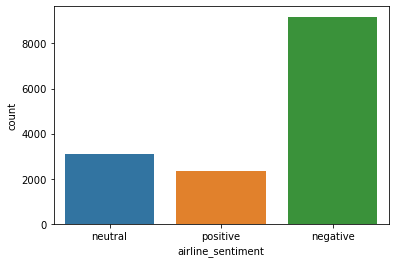

In [6]:
sns.countplot(data=df,x='airline_sentiment');

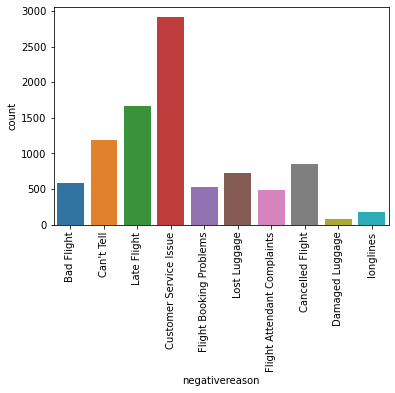

In [7]:
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

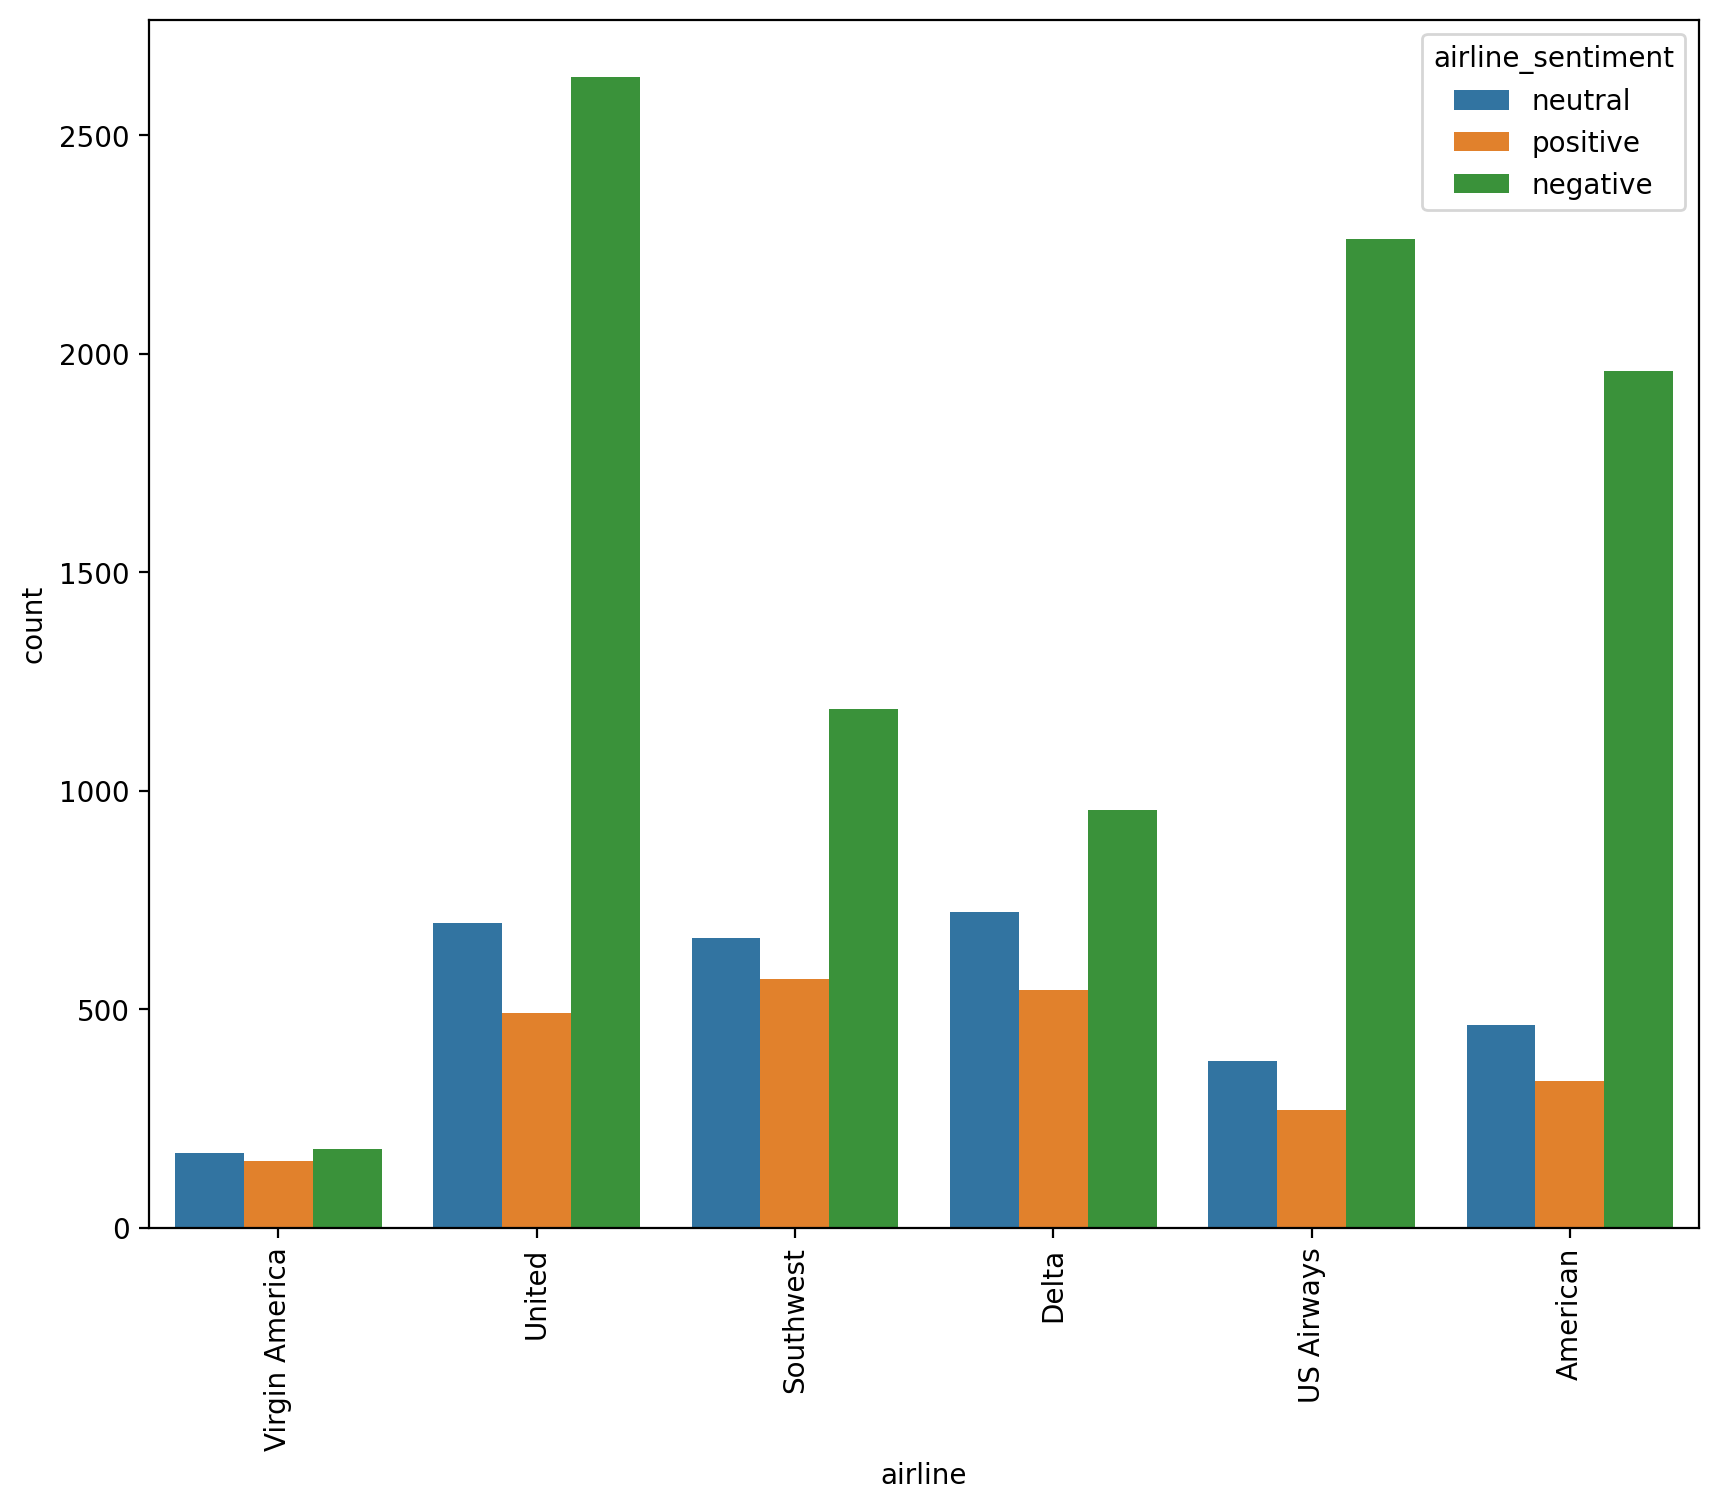

In [8]:
plt.figure(figsize=(10,8),dpi=200)
sns.countplot(data=df,x='airline',hue='airline_sentiment')
plt.xticks(rotation=90);

In [9]:
X=df['text']
y=df['airline_sentiment']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3, random_state=101)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [13]:
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

In [14]:
from sklearn.svm import SVC
model= SVC()
model.fit(X_train,y_train)

SVC()

In [15]:
from sklearn.metrics import classification_report 

In [16]:
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.78      0.95      0.85      2738
     neutral       0.69      0.39      0.50       947
    positive       0.81      0.56      0.66       707

    accuracy                           0.77      4392
   macro avg       0.76      0.64      0.67      4392
weighted avg       0.76      0.77      0.75      4392



In [17]:
# the accuracy 77% 

In [18]:
entry = ['ok flight']
entry = tfidf.transform(entry)
pred = model.predict(entry)
pred

array(['neutral'], dtype=object)

In [19]:
def report(entry):
    entry = tfidf.transform(entry)
    pred = model.predict(entry)
    return (pred)

In [20]:
report(['ok flight'])

array(['neutral'], dtype=object)

In [21]:
report(['good flight'])

array(['positive'], dtype=object)

In [22]:
report(['bad flight'])

array(['negative'], dtype=object)